<a href="https://colab.research.google.com/github/eroali/DeepLearning/blob/main/Assignment_of_Module_3_Convoutional_neural_network_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Troubleshooting Google Colab for the Total Newbie

https://medium.com/datadriveninvestor/troubleshooting-google-colab-for-the-total-newbie-ff29105c198d

# Assignment of Module_3_Convoutional_neural_network (1)

## DIY: Assignment

## **Total Marks: 50**

**Duration: 6 days**

As a part of this assignment following are the list of task that may help improve your skills with CNN and TensorFlow. It is important to get hands-on experience with CNN in order to learn how to use it properly.

You may want to backup this Notebook before making any changes.

**.ipynb file 1**

Marks: 10

        Do you get the exact same results if you run the Notebook multiple times without changing any parameters?
        What is the effect of adding more neurons to each Conv2D layer?
        What happens if we manipulate the value of dropout?
        What is the effect of adding more activation layers to the network?
        What is the accuracy score if we use more dense layers in the model?
        Does manipulating the learning rate affect the model? Justify your answer.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content'

**Problem Statement**

Dataset: The Dogs vs. Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat


It was only effectively addressed in the last few years using deep learning convolutional neural networks. While the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification


**Tasks to be Performed**

In this tutorial you will be performing the following tasks:

    Prepare the dataset for the model
    Install Tensorflow 2.x
    Develop convolutional neural network model for classifying the images or Dog Vs cat
    Plot the change in accuracy per epochs
    Evaluate the model on the testing data
    Analyse the model summary
    Add Dropout to prevent overfitting and check its effect on accuracy
    Increasing the number of Hidden Layers check its effect on accuracy
    Manipulate the batch_size and epochs and check its effect on accuracy



**Dataset Description**

The Dog Vs Cat image classification dataset consists of 8005 images belonging to 2 classes for training images and 2023 images belonging to 2 classes for testing images

    Class I = Dog
    Class II= Cat


# **Skills Gained**

TensorFlow 2.x

    Convolutional neural network implementation
    Model Improvisation
    Model Save
    Load the pretrained model



**Set Runtime Type to GPU**

Load dataset

In [8]:
!wget -cq https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!unzip -qq training_set.zip
!wget -cq https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip
!unzip -qq test_set.zip

replace training_set/training_set/cats/_DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


**Visialize the data**

Populating the interactive namespace from numpy and matplotlib


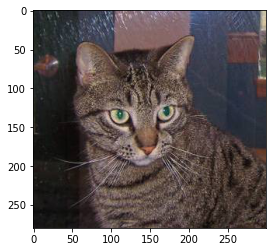

In [9]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#img=mpimg.imread('/content/test_set/test_set/cats/cat.4002.jpg')

img = mpimg.imread('/content/training_set/training_set/cats/cat.1.jpg')
imgplot = plt.imshow(img)
plt.show()

Populating the interactive namespace from numpy and matplotlib


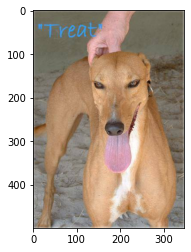

In [10]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#img=mpimg.imread('/content/test_set/test_set/cats/cat.4002.jpg')

img = mpimg.imread('/content/training_set/training_set/dogs/dog.1001.jpg')
imgplot = plt.imshow(img)
plt.show()

# Import Libraries

In [11]:
import tensorflow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
print(tensorflow.__version__)

2.3.0


# Designing the Model

Initialize the parameters

Not changing any parameters

In [12]:
img_width, img_height = 150,150  #width and height of the images
train_data_dir = r"/content/training_set/training_set"
validation_data_dir=r"/content/test_set/test_set"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

In [13]:
# check shape of image

import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

Generate Images to train the model

In [14]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)

test_datagen=ImageDataGenerator (rescale=1./255)

train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])

#Now this, will generate training generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)

validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')
#Now, this will generate testing generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)



Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


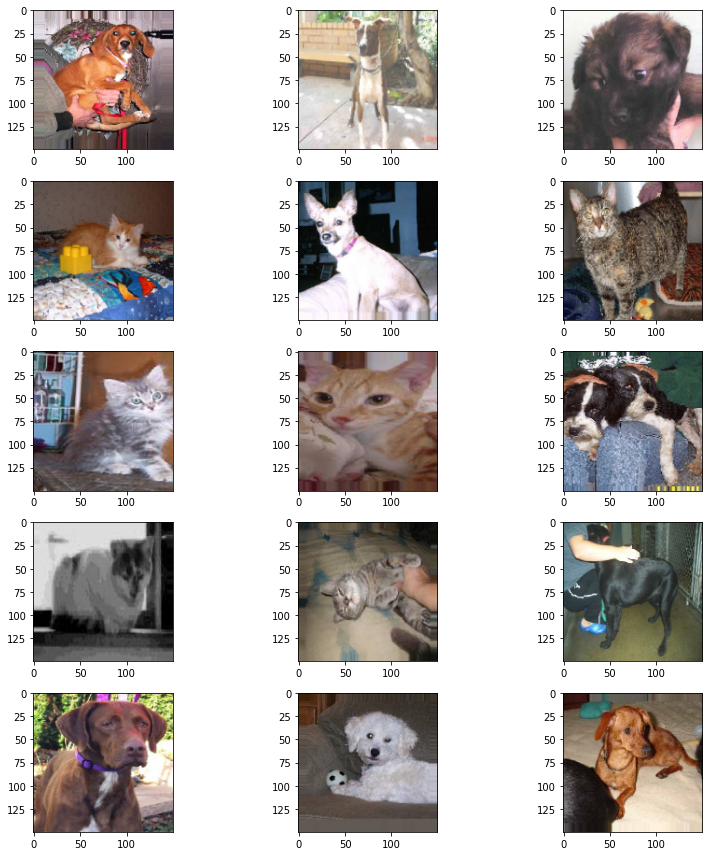

In [15]:
# Visual Representation of ImageDataGenerator

plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

**We can see that although we did not change parameters, we still do not see the same set of images as in the example shown in the practice model (Copy of Module_3_Convoutional_neural_network (1).ipynb**



# **Build the basic CNN model_0**



    Adding convolutional neural network in the model

    add() - Helps to add layers in the model

    Conv2D() - Convolutional layer (to extract features from the images)

    Conv2D(32,(3,3),input_shape=input_shape)
        32 - Take 32 features from the given image
        (3,3) - Metrics size of the images(3*3)
        input_shape = image size

    Activation function (relu) is added to remove the negative values **bold text**


In [9]:
# Start
from tensorflow import keras

# Initialising the CNN
model_0 = keras.models.Sequential()

# Step 1 - Add a conv layer for feature extraction -64 neurons with 3*3 filter
model_0.add(Conv2D(64, (3, 3), input_shape = input_shape, activation = 'relu'))

# Step 2 - Pooling. MaxPooling2D helps to reduce the size of the data
model_0.add(MaxPooling2D(pool_size=(2,2)))

# Step 3 - Flattening - Converts multi dimensional array to 1D channel
model_0.add(Flatten())

# This is where traditional neural network starts #<<<<<<<<<<<<<<<<<<
# Step 4 - Add a hidden layer - 64 neutrons 
model_0.add(Dense(64, input_shape = input_shape, activation = 'relu'))

# Step 5 - Add a Dense output layer
model_0.add(Dense (1, activation = 'sigmoid')) # binary decision

# model_0.add(Dense (2, activation = 'sigmoid')) # binary decision

model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 350464)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                22429760  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 22,431,617
Trainable params: 22,431,617
Non-trainable params: 0
_________________________________________________________________


# **Compile the basic CNN model_0**




In [11]:
model_0.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 350464)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                22429760  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 22,431,617
Trainable params: 22,431,617
Non-trainable params: 0
_________________________________________________________________


# Fit the basic CNN model 

In [17]:
training = model_0.fit(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

Epoch 1/20
100/100 [==============================] - 82s 819ms/step - loss: 0.5451 - accuracy: 0.7415 - val_loss: 0.5514 - val_accuracy: 0.7405
Epoch 2/20
100/100 [==============================] - 81s 815ms/step - loss: 0.5298 - accuracy: 0.7530 - val_loss: 0.5666 - val_accuracy: 0.7275
Epoch 3/20
100/100 [==============================] - 81s 815ms/step - loss: 0.5476 - accuracy: 0.7315 - val_loss: 0.5504 - val_accuracy: 0.7490
Epoch 4/20
100/100 [==============================] - 81s 815ms/step - loss: 0.5308 - accuracy: 0.7360 - val_loss: 0.5728 - val_accuracy: 0.7375
Epoch 5/20
100/100 [==============================] - 81s 812ms/step - loss: 0.5147 - accuracy: 0.7395 - val_loss: 0.7856 - val_accuracy: 0.6855
Epoch 6/20
100/100 [==============================] - 81s 810ms/step - loss: 0.5263 - accuracy: 0.7505 - val_loss: 0.6320 - val_accuracy: 0.7080
Epoch 7/20
100/100 [==============================] - 81s 810ms/step - loss: 0.5232 - accuracy: 0.7505 - val_loss: 0.5406 - val_ac

# Q1: Do you get the exact same results if you run the Notebook multiple times without changing any parameters?

**RUN-1: test accuracy: 0.7549 , val_accuracy: 0.7415**



**RUN-2: test accuracy: 0.7705 , val_accuracy: 0.7435**

**We do not get the exact same results if we run the Notebook multiple times without changing any parameters**

**Find the accuracy score**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


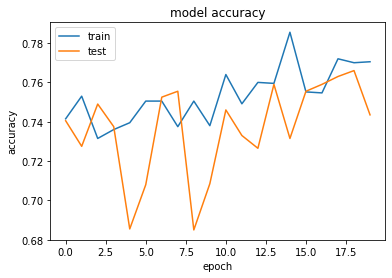

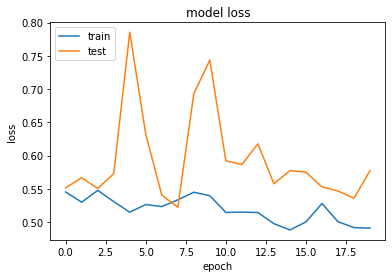

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Plot the change in accuracy per epoch**

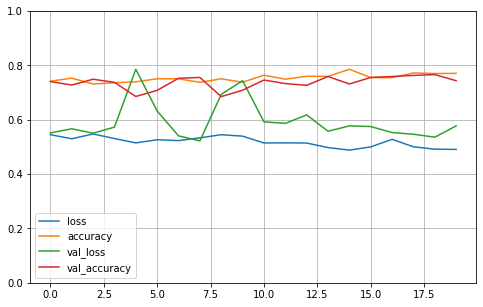

In [19]:
import pandas as pd

pd.DataFrame(training.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**Predict the image**

[[1.]]
Prediction:  Dog


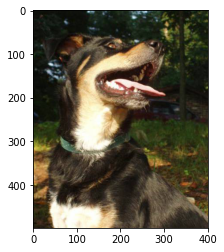

In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4550.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model_0.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4550.jpg')
imgplot = plt.imshow(img)
plt.show()


## **No Error in prediction**

---



[[0.]]
Prediction:  Cat


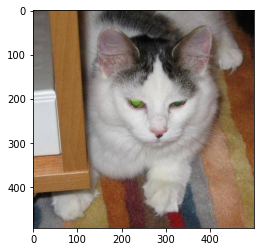

In [21]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4550.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model_0.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4550.jpg')
imgplot = plt.imshow(img)
plt.show()


# **Correct prediction**

# **Build the basic CNN model_1**

**Let's add add some layers to prevent ovetfitting**

Dropout: used to deactive some neurons randomly to prevent overfitting

Early Stop: To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

Learning Rate Reduction: We will reduce the learning rate when then accuracy not increase for 2 steps

   ** monitor: quantity to be monitored.**
    
    factor: factor by which the learning rate will be reduced. new_lr = lr * factor
    
    patience: number of epochs with no improvement after which learning rate will be reduced.
    
    verbose: int. 0: quiet, 1: update messages.
    
    mode: one of {auto, min, max}. 
    
    In min mode, lr will be reduced when the quantity monitored has stopped decreasing; in max mode it will be reduced when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity.

    min_delta: threshold for measuring the new optimum, to only focus on significant changes.

    cooldown: number of epochs to wait before resuming normal operation after lr has been reduced.
    
    min_lr: lower bound on the learning rate.



In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.layers import Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

In [23]:
'''
model_1 = Sequential()
model_1 = Sequential()
model_1.add(Conv2D(64,(3,3),input_shape=input_shape)) #64 neurons with 3*3 filter
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Flatten())
model_1.add(Dense(64)) #64 neurons with 3*3 filter
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))#Prevents overfitting of the model and it has the effect of reducing the capacity or thinning the network during training 
model_1.add(Dense(1)) #output layer
model_1.add(Activation('sigmoid')) #sigmoid activation function
model_1.summary()
'''
p=0

In [24]:
# Start
from tensorflow import keras

# Initialising the CNN
model_1 = keras.models.Sequential()

# Step 1 - Add a conv layer for feature extraction -64 neurons with 3*3 filter
model_1.add(Conv2D(64, (3, 3), input_shape = input_shape, activation = 'relu'))


# Step 2 - Pooling. MaxPooling2D helps to reduce the size of the data
model_1.add(MaxPooling2D(pool_size=(2,2)))

# Step 3 - Flattening - Converts multi dimensional array to 1D channel
model_1.add(Flatten())

# This is where traditional neural network starts #<<<<<<<<<<<<<<<<<<
# Step 4 - Add a hidden layer - 64 neutrons 
model_1.add(Dense(64, input_shape = input_shape, activation = 'relu'))


# Step 5 - Add Dropouts - thinning the network during training 
model_1.add(Dropout(0.5))#Prevents overfitting of the model 

# Step 6 - Add a Dense output layer
model_1.add(Dense (1, activation = 'sigmoid')) # binary decision

# model_1.add(Dense (2, activation = 'sigmoid')) # binary decision

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 350464)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                22429760  
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 22,431,617
Trainable params: 22,431,617
Non-trainable params: 0
__________________________________________

# **Compile the basic CNN model_1**

In [25]:
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 350464)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                22429760  
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 22,431,617
Trainable params: 22,431,617
Non-trainable params: 0
__________________________________________

# **Fit CNN model_1**

In [26]:
training = model_1.fit(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                   validation_steps=nb_validation_samples,callbacks=callbacks)

Epoch 1/20
100/100 [==============================] - 21s 207ms/step - loss: 2.4502 - accuracy: 0.4963 - val_loss: 0.7010 - val_accuracy: 0.4980
Epoch 2/20
100/100 [==============================] - 20s 204ms/step - loss: 0.6956 - accuracy: 0.5025 - val_loss: 0.6913 - val_accuracy: 0.5300
Epoch 3/20
100/100 [==============================] - 20s 203ms/step - loss: 0.6925 - accuracy: 0.5235 - val_loss: 0.6908 - val_accuracy: 0.5610
Epoch 4/20
100/100 [==============================] - 20s 203ms/step - loss: 0.6924 - accuracy: 0.5120 - val_loss: 0.6871 - val_accuracy: 0.5030
Epoch 5/20
100/100 [==============================] - 20s 204ms/step - loss: 0.6924 - accuracy: 0.5075 - val_loss: 0.6836 - val_accuracy: 0.5765
Epoch 6/20
100/100 [==============================] - 20s 205ms/step - loss: 0.6819 - accuracy: 0.5511 - val_loss: 0.6772 - val_accuracy: 0.5865
Epoch 7/20
100/100 [==============================] - 20s 204ms/step - loss: 0.6814 - accuracy: 0.5557 - val_loss: 0.6828 - val_ac

**Find model_1 accuracy score**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


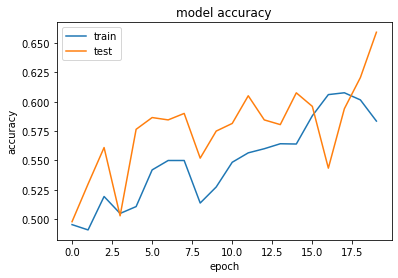

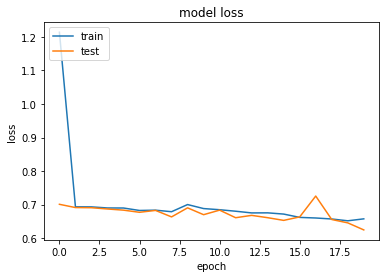

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**plot changes in accuracy per epoch**

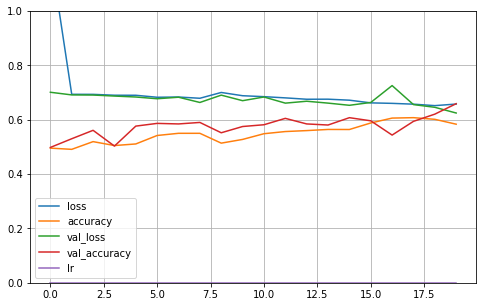

In [28]:
import pandas as pd

pd.DataFrame(training.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**predict image**

[[1.]]
Prediction:  Dog


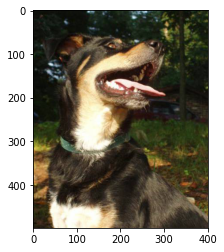

In [29]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4550.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model_1.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4550.jpg')
imgplot = plt.imshow(img)
plt.show()

**No Error in prediction**

[[0.00043805]]
Prediction:  Cat


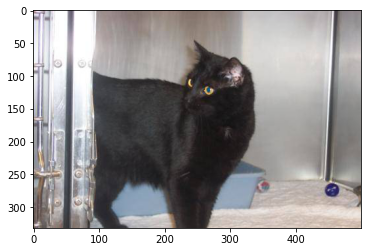

In [30]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4500.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model_1.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4500.jpg')
imgplot = plt.imshow(img)
plt.show()

**correct prediction**

Question:

Do you get the exact same results if you run the Notebook multiple times without changing any parameters?

Answer:

No

Question:

What is the effect of adding more neurons to each Conv2D layer?

No, let's see by doing that..

**build cnn model_1a with more neurons in Conv layers**

https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras.layers import Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

In [32]:
# Start
from tensorflow import keras

# Initialising the CNN
model_1a = keras.models.Sequential()

# Step 1 - Add a conv layer for feature extraction -128 neurons with 3*3 filter
model_1a.add(Conv2D(128, (3, 3), input_shape = input_shape, activation = 'relu'))
# model_1a.add(BatchNormalization()) #<<<<<<<<<<<<<<<<<<<<<<<<<<
# Step 2 - Pooling. MaxPooling2D helps to reduce the size of the data
model_1a.add(MaxPooling2D(pool_size=(2,2)))


# Step 3 - Add aother conv layer -128 neurons with 3*3 filter
model_1a.add(Conv2D(128, (3, 3), input_shape = input_shape, activation = 'relu'))
# model_1a.add(BatchNormalization()) #<<<<<<<<<<<<<<<<<<<<<<<<<<
# Step 4 - Pooling. MaxPooling2D helps to reduce the size of the data
model_1a.add(MaxPooling2D(pool_size=(2,2)))


# Step 5 - Flattening - Converts multi dimensional array to 1D channel
model_1a.add(Flatten())


# This is where traditional neural network starts #<<<<<<<<<<<<<<<<<<
# Step 6 - Add a hidden layer - 64 neutrons 
model_1a.add(Dense(64, input_shape = input_shape, activation = 'relu'))

# Step 7 - Add Dropouts - thinning the network during training 
model_1a.add(Dropout(0.5))#Prevents overfitting of the model 

# Step 8 - Add a Dense output layer
model_1a.add(Dense (1, activation = 'sigmoid')) # binary decision

# model_1.add(Dense (2, activation = 'sigmoid')) # binary decision

model_1a.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 165888)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                10616896  
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)               

**complile model_1a**

In [33]:
model_1a.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_1a.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 165888)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                10616896  
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)               

**fit model_1a**

In [38]:
training = model_1a.fit(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

Epoch 1/20
100/100 [==============================] - 22s 225ms/step - loss: nan - accuracy: 0.4935 - val_loss: nan - val_accuracy: 0.5020
Epoch 2/20
100/100 [==============================] - 23s 226ms/step - loss: nan - accuracy: 0.4975 - val_loss: nan - val_accuracy: 0.5000
Epoch 3/20
100/100 [==============================] - 23s 227ms/step - loss: nan - accuracy: 0.4825 - val_loss: nan - val_accuracy: 0.4990
Epoch 4/20
100/100 [==============================] - 23s 228ms/step - loss: nan - accuracy: 0.4995 - val_loss: nan - val_accuracy: 0.5005
Epoch 5/20
100/100 [==============================] - 23s 226ms/step - loss: nan - accuracy: 0.5174 - val_loss: nan - val_accuracy: 0.5005
Epoch 6/20
100/100 [==============================] - 23s 227ms/step - loss: nan - accuracy: 0.4935 - val_loss: nan - val_accuracy: 0.5020
Epoch 7/20
100/100 [==============================] - 23s 226ms/step - loss: nan - accuracy: 0.4925 - val_loss: nan - val_accuracy: 0.5025
Epoch 8/20
100/100 [=======

**find model_1a accuracy score**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


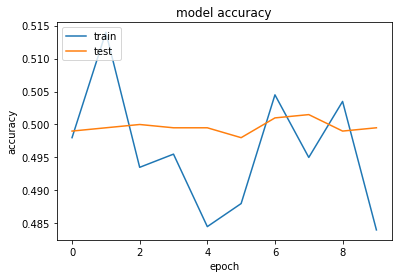

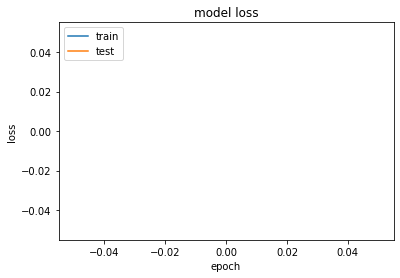

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**predict image**

[[0.]]
Prediction:  Cat


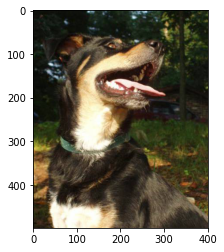

In [39]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4550.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model_1a.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4550.jpg')
imgplot = plt.imshow(img)
plt.show()

**wrong prediction**

[[0.]]
Prediction:  Cat


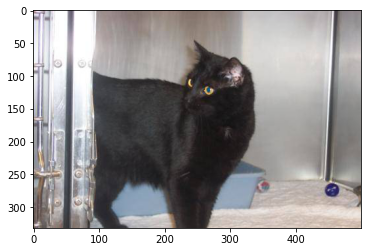

In [40]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4500.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model_1a.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4500.jpg')
imgplot = plt.imshow(img)
plt.show()

**correct prediction**